In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


In [2]:
data_filepath = "data.csv"
data = pd.read_csv(data_filepath, delimiter=";", decimal=",", parse_dates=["dt"])

In [3]:
date_data=data.sort_values("dt")
date_data=date_data.groupby(date_data.dt.dt.date).agg({"battles": sum, "revenue":sum, "player_id":'count'})
date_data

,battles,revenue,player_id
dt,,,
2017-01-04,146024,1938.44,2474
2017-01-05,304615,3364.51,5454
2017-02-04,149221,858.54,2426
2017-02-05,210789,1120.91,3928
2017-03-04,114642,892.50,2084
...,...,...,...
2019-11-04,130746,1489.80,2425
2019-11-05,93468,1482.93,1614
2019-12-03,81058,861.11,1376


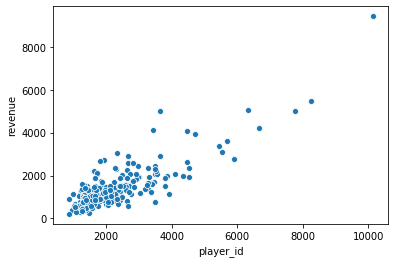

In [4]:
sns.scatterplot(date_data.player_id, date_data.revenue)

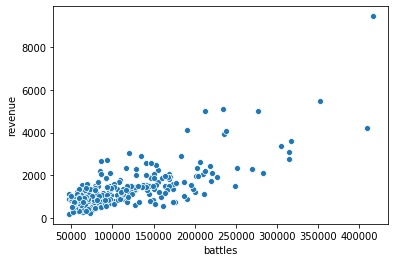

In [5]:
sns.scatterplot(date_data.battles, date_data.revenue)

In [7]:
player_data=data.groupby(["player_id"]).agg({"battles": sum, "revenue":sum, "dt":'count'})
player_data

,battles,revenue,dt
player_id,,,
1000050800,16,0.0,2
1000075296,293,0.0,9
1000193607,1829,0.0,50
1000209014,1872,0.0,31
1000450220,3,0.0,1
...,...,...,...
9988343334,3,0.0,1
9989776616,30,0.0,1
9990811204,75,0.0,6


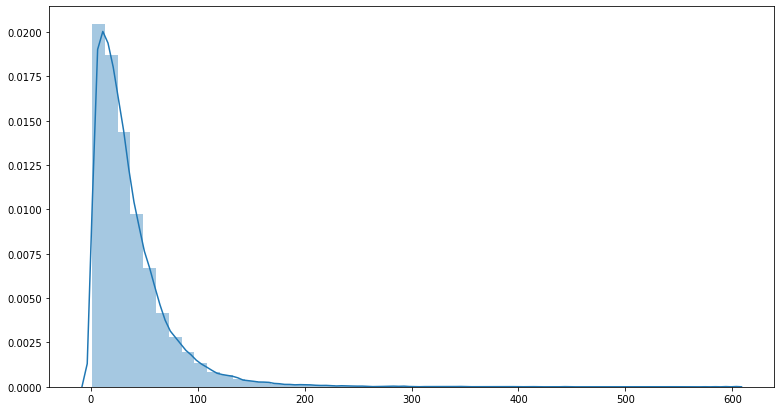

In [12]:
plt.figure(figsize=(13, 7))
sns.distplot((player_data.battles[player_data.revenue==0]/player_data.dt[player_data.revenue==0]))

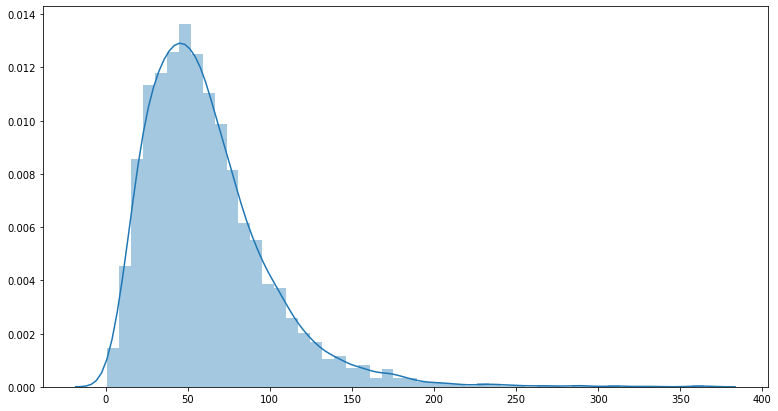

In [14]:
plt.figure(figsize=(13, 7))
sns.distplot((player_data.battles[player_data.revenue>0]/player_data.dt[player_data.revenue>0]))